In [1]:
# loading important packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

In [3]:
# loading the dataset
pc1 = io.loadmat('107_purDat.mat')

In [5]:
# Create arrays based on the keys
pc1_ppos = pc1['ppos']
pc1_fepos = pc1['fepos']
pc1_purSt = pc1['purSt']
pc1_feSt = pc1['feSt']

In [7]:
# reshape the arrays

pc1_purSt = pc1_purSt.reshape(71281,)
pc1_feSt = pc1_feSt.reshape(34707,)

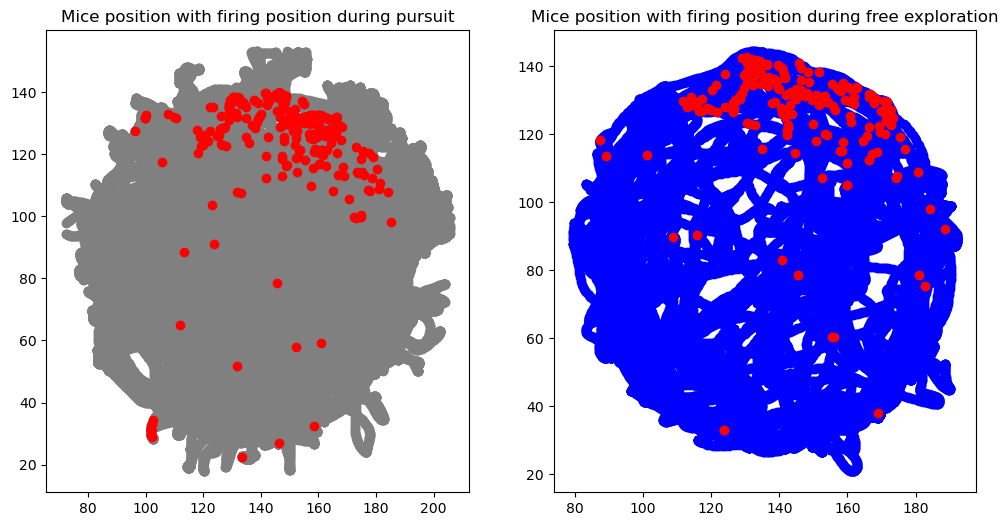

In [9]:
# Plot all the mouse positions and the positions with neuron firing. 
plt.figure(figsize=(12, 6))  # Adjust figure size

plt.subplot(1,2,1)
plt.scatter(pc1['ppos'][:,0], pc1['ppos'][:,1], color = 'gray')
plt.scatter(pc1['ppos'][pc1_purSt>0, 0],pc1['ppos'][pc1_purSt>0, 1],color = 'red')
plt.title("Mice position with firing position during pursuit")




plt.subplot(1,2,2)
plt.scatter(pc1['fepos'][:,0], pc1['fepos'][:,1], color = 'blue')
plt.scatter(pc1['fepos'][pc1_feSt>0, 0],pc1['fepos'][pc1_feSt>0, 1],color = 'red')
plt.title("Mice position with firing position during free exploration")


plt.show()

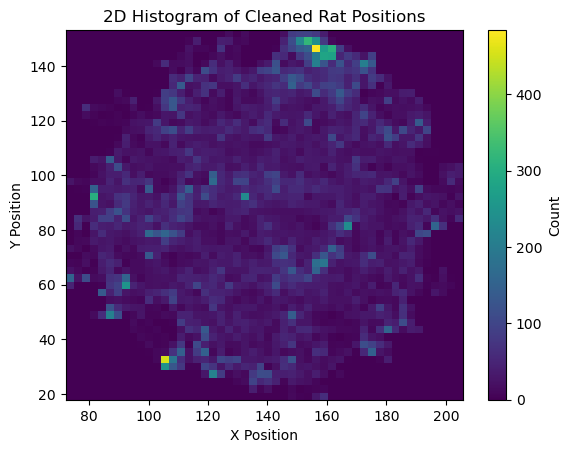

In [11]:
clean_pc1_ppos = pc1_ppos[~np.isnan(pc1_ppos).any(axis=1)]

# Compute the 2D histogram/bin counts using the cleaned position data
N, Xedges, Yedges = np.histogram2d(clean_pc1_ppos[:, 0], clean_pc1_ppos[:, 1], bins= 50)

# Plot the 2D histogram/bin counts using imshow (simulating MATLAB's imagesc function)
plt.figure()
plt.imshow(N, interpolation='nearest', origin='lower', 
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')

# Add color bar and labels for reference
plt.colorbar(label='Count')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Histogram of Cleaned Rat Positions')

# Display the plot
plt.show()

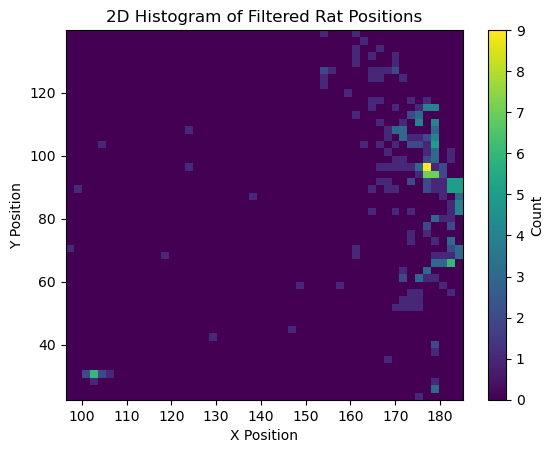

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# First, ensure that `pc1_purSt` and `pc1_ppos` have the same length
assert len(pc1_purSt) == len(pc1_ppos), "pc1_purSt and pc1_ppos must have the same length."

# Filter out NaN values and apply the condition that `pc1_purSt` > 0
valid_indices = (pc1_purSt > 0) & ~np.isnan(pc1_ppos).any(axis=1)

# Filter both arrays using the valid indices
clean_pc1_purSt = pc1_purSt[valid_indices]
clean_pc1_ppos = pc1_ppos[valid_indices]

# Compute the 2D histogram/bin counts using the filtered position data
N, Xedges, Yedges = np.histogram2d(clean_pc1_ppos[:, 0], clean_pc1_ppos[:, 1], bins=50)

# Plot the 2D histogram/bin counts using imshow (simulating MATLAB's imagesc function)
plt.figure()
plt.imshow(N, interpolation='nearest', origin='lower', 
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')

# Add color bar and labels for reference
plt.colorbar(label='Count')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Histogram of Filtered Rat Positions')

# Display the plot
plt.show()

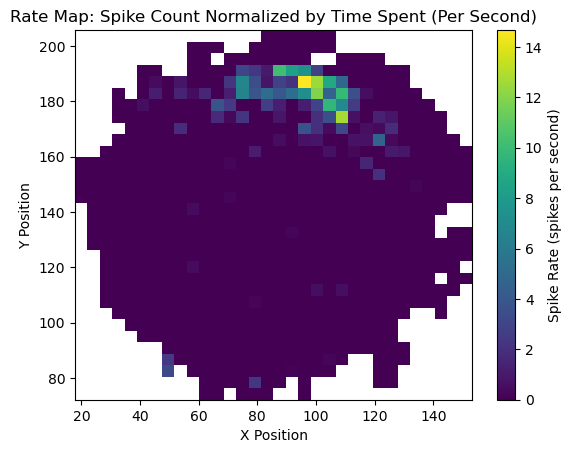

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure that pc1_purSt and pc1_ppos have the same length initially
assert len(pc1_purSt) == len(pc1_ppos), "pc1_purSt and pc1_ppos must have the same length."

# Find valid indices where both X and Y in pc1_ppos are not NaN
valid_indices = ~np.isnan(pc1_ppos).any(axis=1)

# Filter both arrays to remove NaN rows from pc1_ppos and corresponding entries from pc1_purSt
clean_pc1_ppos = pc1_ppos[valid_indices]
clean_pc1_purSt = pc1_purSt[valid_indices]

# Define the number of bins
bins = 32

# Compute the 2D histogram for position (amount of time spent at each position)
pos_hist, Xedges, Yedges = np.histogram2d(
    clean_pc1_ppos[:, 1], clean_pc1_ppos[:, 0], bins=bins
)

# Compute the 2D histogram for spikes, weighted by the number of spikes at each position
spike_hist, _, _ = np.histogram2d(
    clean_pc1_ppos[:, 1], clean_pc1_ppos[:, 0], bins=[Xedges, Yedges], weights=clean_pc1_purSt
)

# To avoid division by zero, replace zeros in pos_hist with a small value (or use np.nan)
pos_hist_no_zero = np.where(pos_hist == 0, np.nan, pos_hist)

# Compute the rate map (spikes per time spent) by dividing the spike histogram by the position histogram
rate_map = spike_hist / pos_hist_no_zero

# Scale the rate map by 60 to convert the rate to spikes per second
rate_map_per_second = rate_map * 60

# Plot the rate map using imshow
plt.figure()
plt.imshow(rate_map_per_second, interpolation='nearest', origin='lower', 
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')

# Add color bar and labels for reference
plt.colorbar(label='Spike Rate (spikes per second)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Rate Map: Spike Count Normalized by Time Spent (Per Second)')

# Display the plot
plt.show()

In [23]:
# Find the maximum spike rate in the rate map
max_spike_rate = np.nanmax(rate_map_per_second)

# Find the index of the maximum spike rate
max_index = np.unravel_index(np.nanargmax(rate_map_per_second), rate_map_per_second.shape)

# Convert the index into the actual position (X, Y coordinates) using the bin edges
max_x_position = (Xedges[max_index[1]] + Xedges[max_index[1] + 1]) / 2
max_y_position = (Yedges[max_index[0]] + Yedges[max_index[0] + 1]) / 2

# Print the results
print(f"Maximum Spike Rate: {max_spike_rate} spikes per second")
print(f"Position with Maximum Spike Rate: X = {max_x_position}, Y = {max_y_position}")

Maximum Spike Rate: 14.666666666666666 spikes per second
Position with Maximum Spike Rate: X = 96.07113525436448, Y = 186.89241912270808


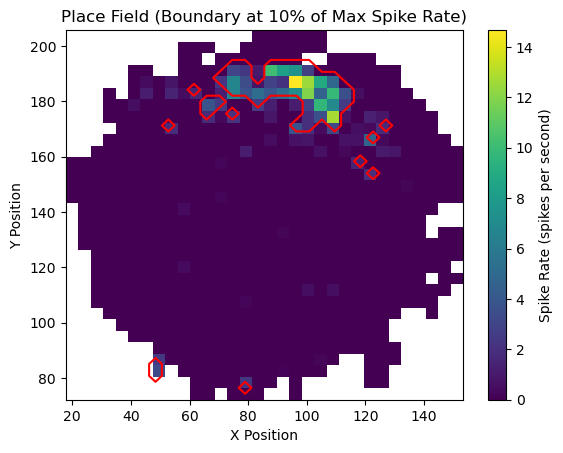

Threshold for Place Field: 1.4666666666666668 spikes per second


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the maximum spike rate
max_spike_rate = np.nanmax(rate_map_per_second)

# Define the threshold for the place field (10% of the maximum spike rate)
threshold = 0.10 * max_spike_rate

# Create a mask for the place field (True for values above the threshold)
place_field_mask = rate_map_per_second >= threshold

# Plot the original rate map using imshow
plt.figure()
img = plt.imshow(rate_map_per_second, interpolation='nearest', origin='lower', 
                 extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')

# Add the color bar for the imshow plot (rate map)
plt.colorbar(img, label='Spike Rate (spikes per second)')

# Overlay the place field boundary where the spike rate is greater than 10% of max spike rate
plt.contour(place_field_mask, levels=[0.5], colors='red', 
            extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]])

# Add labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Place Field (Boundary at 10% of Max Spike Rate)')

# Display the plot
plt.show()

# Print threshold for reference
print(f"Threshold for Place Field: {threshold} spikes per second")


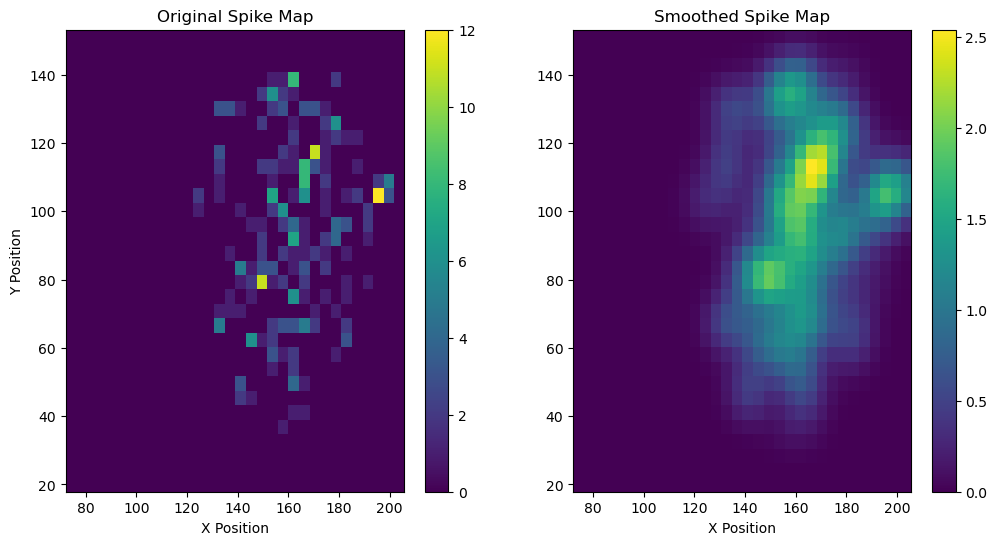

Applied Gaussian filter with sigma=1.4 to the spike map.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Assume you have these two arrays: 
# - pc1_ppos: an array of (x, y) positions
# - pc1_purSt: an array of spike counts corresponding to these positions

# Get the dimensions of the rate map (assumed to be the same as the spike map)
map_height, map_width = rate_map_per_second.shape

# Create a "spike map" that is initially all zeros, same size as the rate map
spike_map = np.zeros((map_height, map_width))

# Normalize the positions to fit within the bounds of the spike_map
# Assuming that pc1_ppos contains coordinates in some larger space
# Here, we assume that pc1_ppos maxes out at some larger value, say max_x and max_y
max_x = np.nanmax(clean_pc1_ppos[:, 0])
max_y = np.nanmax(clean_pc1_ppos[:, 1])

# Convert positions to indices in the spike_map
for i in range(len(clean_pc1_ppos)):
    x, y = clean_pc1_ppos[i]  # Get the (x, y) position
    if not np.isnan(x) and not np.isnan(y):  # Ensure the position is valid
        # Normalize and convert to indices
        x_idx = int((x / max_x) * (map_width - 1))  # Scale x to fit within the map width
        y_idx = int((y / max_y) * (map_height - 1))  # Scale y to fit within the map height
        spike_map[y_idx, x_idx] += pc1_purSt[i]  # Add the spike count to the map

# Apply Gaussian filter only to the spike map
sigma_value = 1.4  # Adjust this based on the desired amount of smoothing
smoothed_spike_map = gaussian_filter(spike_map, sigma=sigma_value)

# Plot the original spike map and the smoothed spike map for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original spike map (without smoothing)
ax1.imshow(spike_map, interpolation='nearest', origin='lower', 
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')
ax1.set_title('Original Spike Map')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
plt.colorbar(ax1.imshow(spike_map, interpolation='nearest', origin='lower',
                        extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto'), ax=ax1)

# Smoothed spike map (after applying Gaussian filter)
ax2.imshow(smoothed_spike_map, interpolation='nearest', origin='lower', 
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')
ax2.set_title('Smoothed Spike Map')
ax2.set_xlabel('X Position')
plt.colorbar(ax2.imshow(smoothed_spike_map, interpolation='nearest', origin='lower', 
                        extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto'), ax=ax2)

plt.show()

# Print debug information
print(f"Applied Gaussian filter with sigma={sigma_value} to the spike map.")


# sigma_values = [0.5, 1.0, 2.0, 2.68]

# fig, axes = plt.subplots(1, len(sigma_values), figsize=(15, 5))

# for i, sigma in enumerate(sigma_values):
#     smoothed_map = gaussian_filter(spike_map, sigma=sigma)
#     img = axes[i].imshow(smoothed_map.T, interpolation='nearest', origin='lower', 
#                          extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')
#     axes[i].set_title(f'Sigma = {sigma}')
#     plt.colorbar(img, ax=axes[i], label='Smoothed Spike Count')

# plt.show()



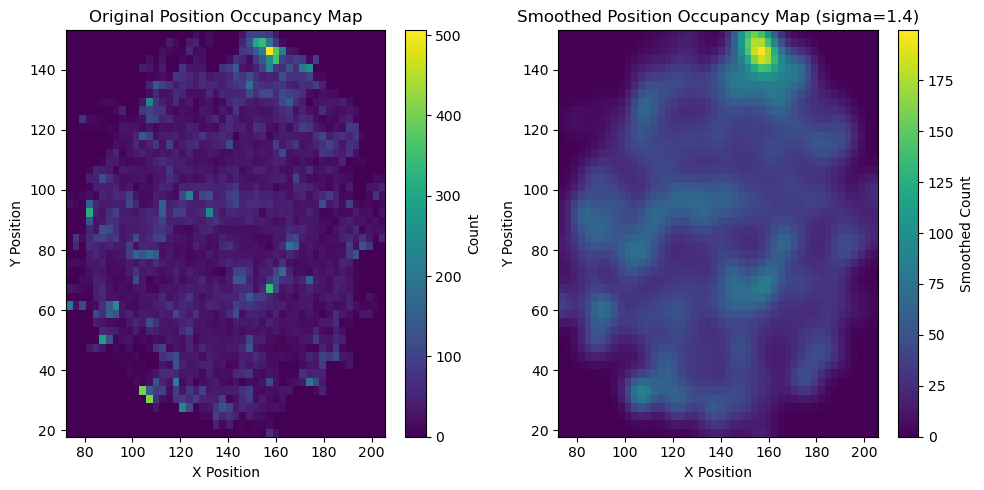

In [39]:

# Apply Gaussian filter for smoothing
# Compute the 2D histogram/bin counts using the cleaned position data
clean_pc1_ppos = pc1_ppos[~np.isnan(pc1_ppos).any(axis=1)]

# Create the position occupancy map (pos_occ) using a 2D histogram
pos_occ, Xedges, Yedges = np.histogram2d(clean_pc1_ppos[:, 0], clean_pc1_ppos[:, 1], bins=48)
sigma_value = 1.4  # Adjust this sigma value as needed for the level of smoothing
smoothed_pos_occ = gaussian_filter(pos_occ, sigma=sigma_value)

# Plot the original position occupancy map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pos_occ, interpolation='nearest', origin='lower',
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')
plt.colorbar(label='Count')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Original Position Occupancy Map')

# Plot the smoothed position occupancy map
plt.subplot(1, 2, 2)
plt.imshow(smoothed_pos_occ, interpolation='nearest', origin='lower',
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')
plt.colorbar(label='Smoothed Count')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Smoothed Position Occupancy Map (sigma={sigma_value})')

plt.tight_layout()
plt.show()


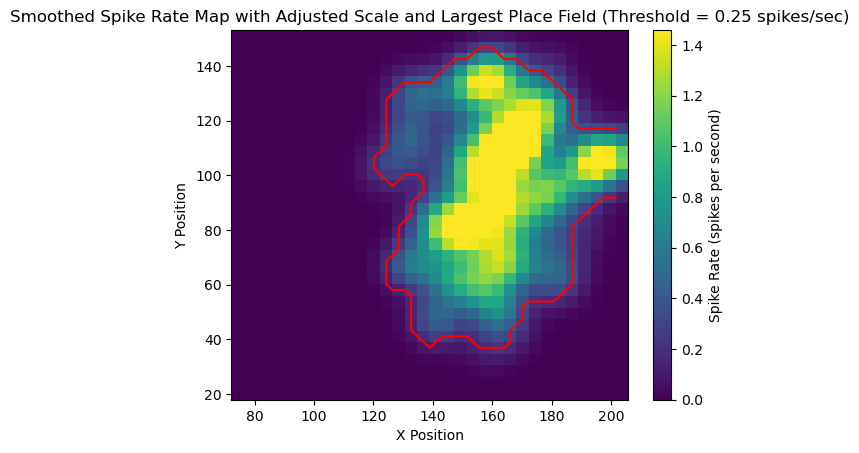

Threshold for Place Field: 0.25 spikes per second


In [47]:
from skimage import measure
from scipy.ndimage import zoom

# Compute separate resizing factors for X and Y
resize_factor_x = smoothed_spike_map.shape[1] / smoothed_pos_occ.shape[1]  # Width
resize_factor_y = smoothed_spike_map.shape[0] / smoothed_pos_occ.shape[0]  # Height

smoothed_spike_rate_map = smoothed_spike_map

# Use the max value from the non-smoothed map for the threshold
max_spike_rate = np.nanmax(smoothed_spike_rate_map)
threshold = 0.10 * max_spike_rate

# Create a mask for the place field (True for values above the threshold)
place_field_mask = smoothed_spike_rate_map >= threshold

# Adjust the scale to show more yellow and green dots
vmin_value = 0  # Minimum value for the color scale
vmax_value = np.percentile(smoothed_spike_rate_map, 95)  # Use 95th percentile for vmax

# Find contours in the place field mask
contours = measure.find_contours(place_field_mask, level=0.5)

# Function to calculate the area of a contour using the Shoelace formula (polygon area in 2D)
def contour_area(contour):
    x = contour[:, 1]  # X values
    y = contour[:, 0]  # Y values
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Find the largest contour based on the calculated area
largest_contour = max(contours, key=contour_area)

# Plot the smoothed spike rate map with adjusted color scale
import matplotlib.pyplot as plt

plt.figure()
img = plt.imshow(smoothed_spike_rate_map, interpolation='nearest', origin='lower', 
                 extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto', 
                 vmin=vmin_value, vmax=vmax_value)

# Add the color bar for the spike rate map
plt.colorbar(img, label='Spike Rate (spikes per second)')

# Overlay only the largest contour and plot it at the correct position
plt.plot(largest_contour[:, 1] * (Xedges[-1] - Xedges[0]) / place_field_mask.shape[1] + Xedges[0], 
         largest_contour[:, 0] * (Yedges[-1] - Yedges[0]) / place_field_mask.shape[0] + Yedges[0], 
         color='red')

# Add labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Smoothed Spike Rate Map with Adjusted Scale and Largest Place Field (Threshold = {threshold:.2f} spikes/sec)')

plt.show()

# Print threshold for reference
print(f"Threshold for Place Field: {threshold:.2f} spikes per second")

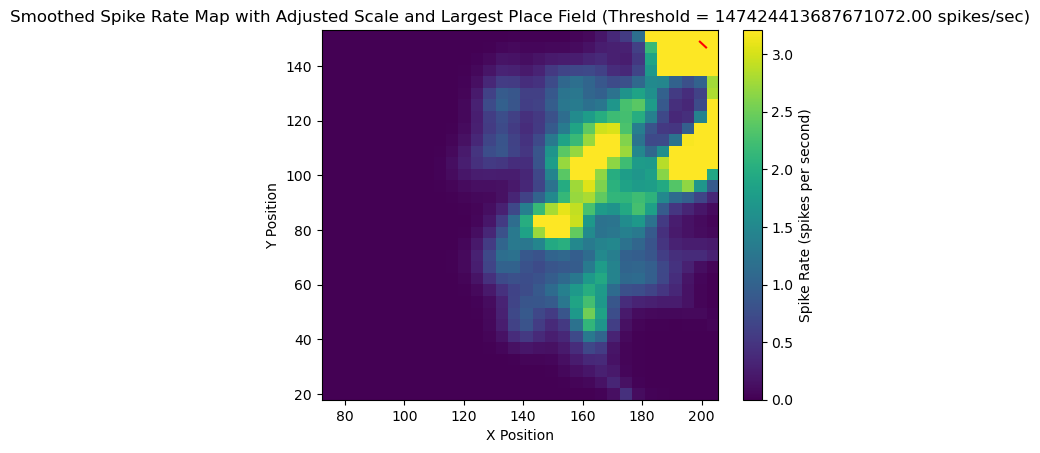

Threshold for Place Field: 147424413687671072.00 spikes per second


In [43]:
from skimage import measure
from scipy.ndimage import zoom

# Compute separate resizing factors for X and Y
resize_factor_x = smoothed_spike_map.shape[1] / smoothed_pos_occ.shape[1]  # Width
resize_factor_y = smoothed_spike_map.shape[0] / smoothed_pos_occ.shape[0]  # Height

# Resize smoothed_pos_occ_map to match smoothed_spike_map
smoothed_pos_occ_map = zoom(smoothed_pos_occ, (resize_factor_y, resize_factor_x))

# Check that the shapes match
assert smoothed_spike_map.shape == smoothed_pos_occ_map.shape, "Shapes do not match after resizing!"

# Avoid division by zero and normalize the spike map
smoothed_spike_rate_map = np.divide(smoothed_spike_map, smoothed_pos_occ_map, 
                                    out=np.zeros_like(smoothed_spike_map), where= smoothed_pos_occ_map > 0) * 60

# Use the max value from the non-smoothed map for the threshold
max_spike_rate = np.nanmax(smoothed_spike_rate_map)
threshold = 0.10 * max_spike_rate

# Create a mask for the place field (True for values above the threshold)
place_field_mask = smoothed_spike_rate_map >= threshold

# Adjust the scale to show more yellow and green dots
vmin_value = 0  # Minimum value for the color scale
vmax_value = np.percentile(smoothed_spike_rate_map, 95)  # Use 95th percentile for vmax

# Find contours in the place field mask
contours = measure.find_contours(place_field_mask, level=0.5)

# Function to calculate the area of a contour using the Shoelace formula (polygon area in 2D)
def contour_area(contour):
    x = contour[:, 1]  # X values
    y = contour[:, 0]  # Y values
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Find the largest contour based on the calculated area
largest_contour = max(contours, key=contour_area)

# Plot the smoothed spike rate map with adjusted color scale
import matplotlib.pyplot as plt

plt.figure()
img = plt.imshow(smoothed_spike_rate_map, interpolation='nearest', origin='lower', 
                 extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto', 
                 vmin=vmin_value, vmax=vmax_value)

# Add the color bar for the spike rate map
plt.colorbar(img, label='Spike Rate (spikes per second)')

# Overlay only the largest contour and plot it at the correct position
plt.plot(largest_contour[:, 1] * (Xedges[-1] - Xedges[0]) / place_field_mask.shape[1] + Xedges[0], 
         largest_contour[:, 0] * (Yedges[-1] - Yedges[0]) / place_field_mask.shape[0] + Yedges[0], 
         color='red')

# Add labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Smoothed Spike Rate Map with Adjusted Scale and Largest Place Field (Threshold = {threshold:.2f} spikes/sec)')

plt.show()

# Print threshold for reference
print(f"Threshold for Place Field: {threshold:.2f} spikes per second")


In [51]:
import numpy as np
from matplotlib.path import Path


# Extract the x and y coordinates of the largest contour
# Apply scaling based on Xedges and Yedges to map contour coordinates to position scale
contour_x = largest_contour[:, 1] * (Xedges[-1] - Xedges[0]) / place_field_mask.shape[1] + Xedges[0]
contour_y = largest_contour[:, 0] * (Yedges[-1] - Yedges[0]) / place_field_mask.shape[0] + Yedges[0]

# Create a Path object from the contour coordinates to use for point-in-polygon testing
place_field_path = Path(np.column_stack((contour_y, contour_x)))

# Now, we can filter the positions in the dataset to check if they lie within the place field
# Assuming `clean_pc1_ppos` contains the x and y positions of your dataset
positions = clean_pc1_ppos  # Make sure these positions are in the same coordinate space

# Find positions within the contour
in_place_field = place_field_path.contains_points(positions)

# Extract the positions that are within the place field
positions_in_place_field = positions[in_place_field]

# Print or save the results
print("Positions within the largest place field:")
print(positions_in_place_field)

Positions within the largest place field:
[[143.59295413  88.11620049]
 [156.63193793  88.38720981]
 [156.42581816  89.18115262]
 ...
 [157.14723734  90.97134097]
 [156.89913022  89.99036356]
 [156.67392529  89.00556911]]


In [52]:
import numpy as np

# Find indices where the value changes in in_place_field
transitions = np.where(np.diff(in_place_field.astype(int)) != 0)[0]

# Extract the positions corresponding to the transition points
enter_exit_positions = positions[transitions]

In [53]:
# filtering out immediate trips

# Find indices where the value changes in in_place_field
transitions = np.where(np.diff(in_place_field.astype(int)) != 0)[0]

# Filter out consecutive transitions
filtered_transitions = [transitions[0]]  # Start with the first transition

for i in range(1, len(transitions)):
    # Only keep the transition if it is at least 2 positions away from the last kept transition
    if transitions[i] - filtered_transitions[-1] >= 2:
        filtered_transitions.append(transitions[i])

# Extract the positions corresponding to the filtered transition points
filtered_enter_exit_positions = positions[filtered_transitions]

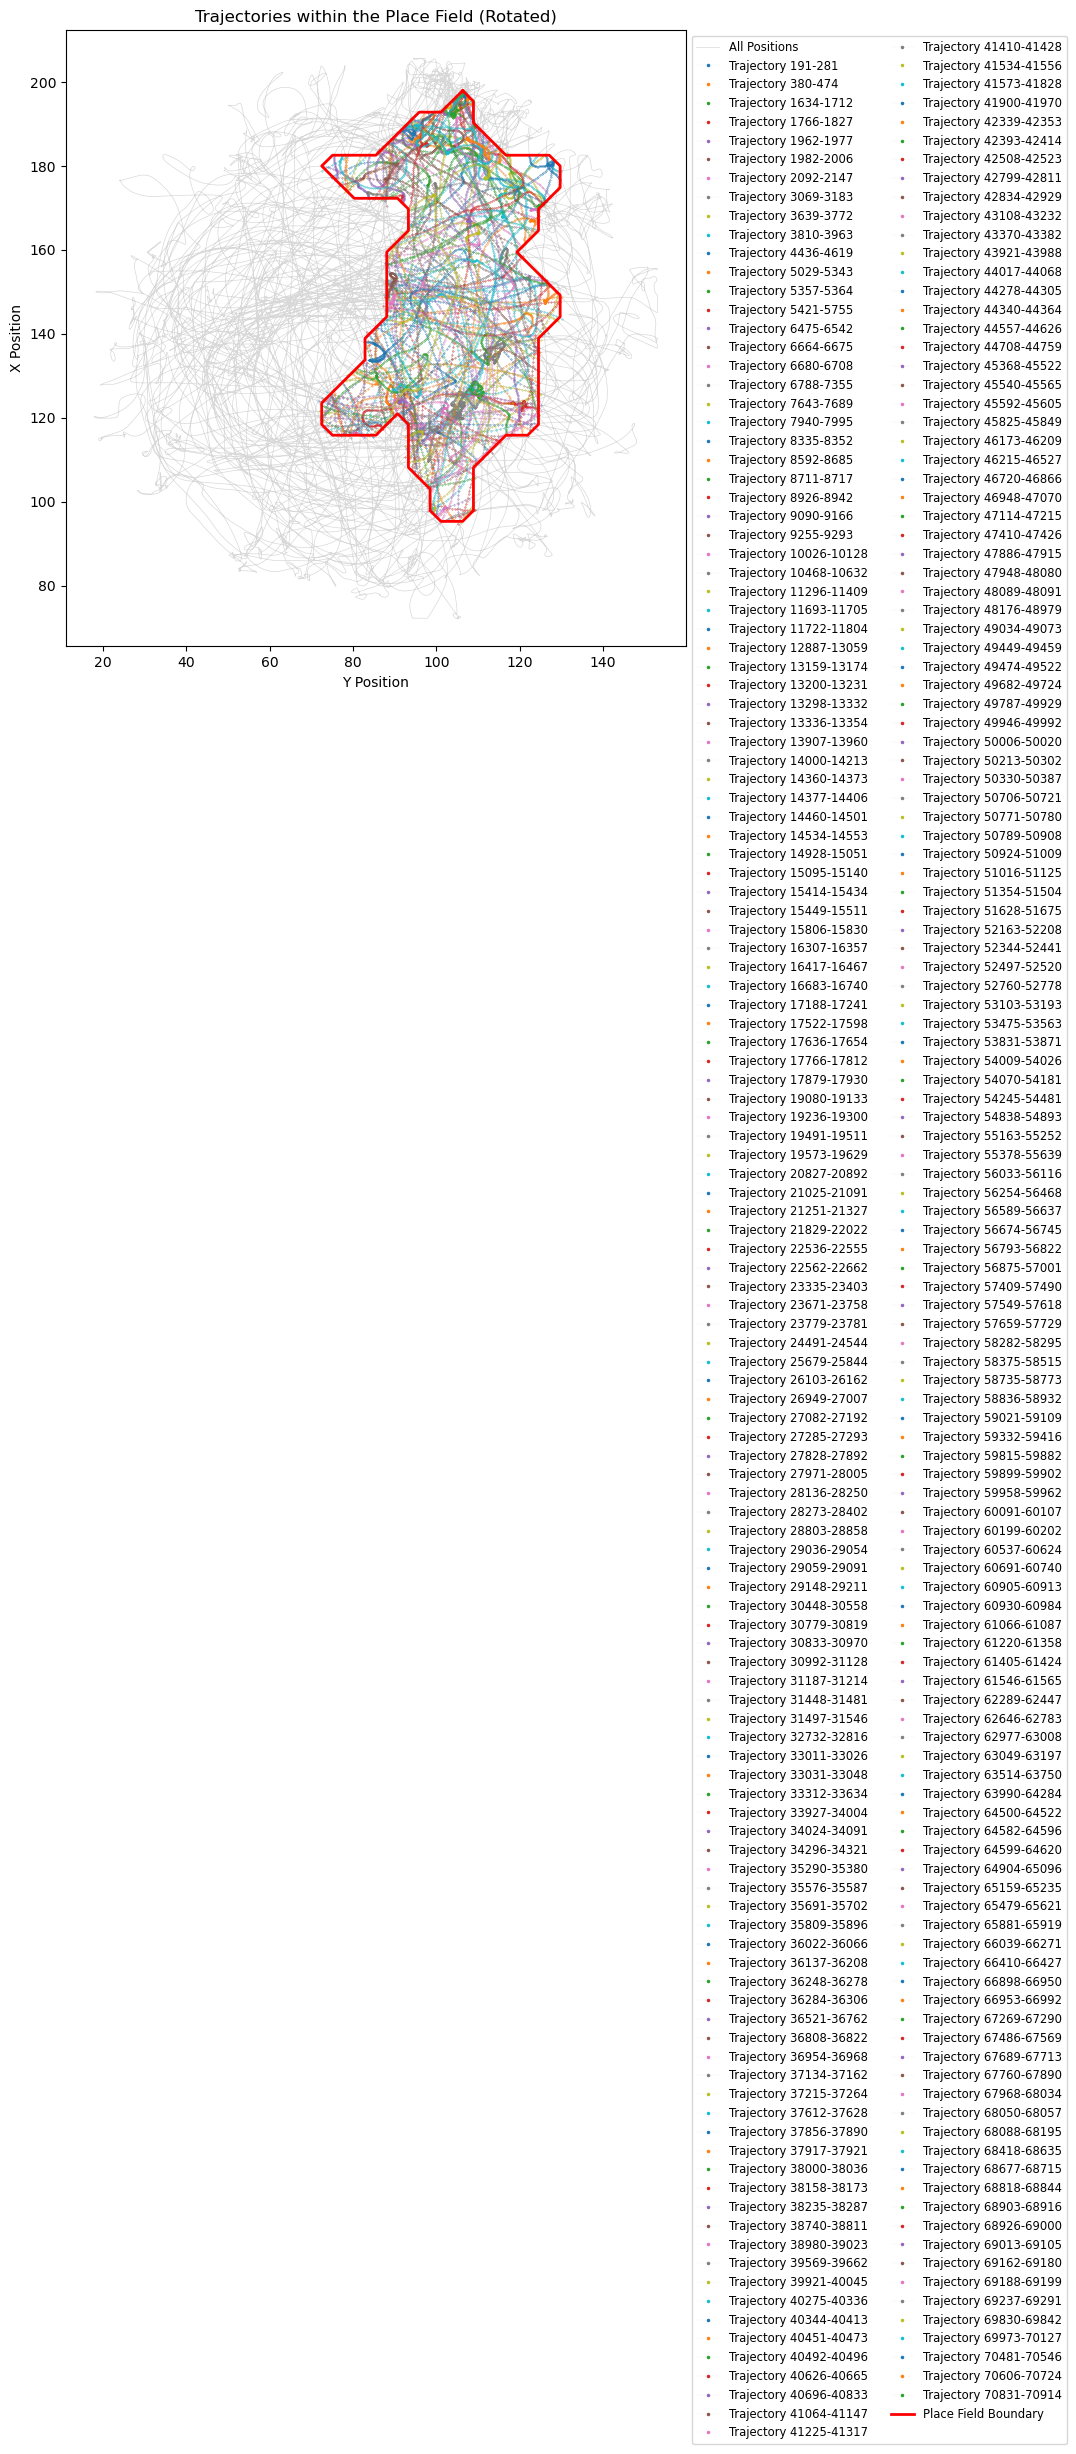

In [54]:
# Assuming filtered_transitions contains the indices of enter and exit points
# Ensure transitions are paired (enter followed by exit)
enter_exit_pairs = []
i = 0
while i < len(filtered_transitions) - 1:
    enter_idx = filtered_transitions[i]
    exit_idx = filtered_transitions[i + 1]
    # Ensure there is an exit following each enter
    if in_place_field[enter_idx] == False and in_place_field[exit_idx] == True:
        enter_exit_pairs.append((enter_idx, exit_idx))
        i += 2  # Move to the next pair
    else:
        i += 1  # Skip if not a valid enter-exit pair

# Plot the trajectories with switched coordinates and thinner lines
plt.figure(figsize=(8, 8))

# Plot all positions for context
plt.plot(positions[:, 1], positions[:, 0], 'gray', alpha=0.3, linewidth=0.5, label="All Positions")

# Plot trajectories within each enter-exit pair
for idx, (enter_idx, exit_idx) in enumerate(enter_exit_pairs):
    # Extract the trajectory positions between enter and exit
    trajectory_positions = positions[enter_idx:exit_idx + 1]
    # Plot the trajectory with thinner lines and switched coordinates
    plt.plot(trajectory_positions[:, 1], trajectory_positions[:, 0], marker='o', markersize=0.3, linewidth=0.02, label=f'Trajectory {enter_idx}-{exit_idx}')

# Plot the contour of the place field for reference with switched coordinates
plt.plot(contour_x, contour_y, 'r-', linewidth=2, label='Place Field Boundary')

# Labels and title
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.title('Trajectories within the Place Field (Rotated)')

# Optional: Limit the number of legend entries for readability
if len(enter_exit_pairs) > 20:
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2, fontsize="small", markerscale=5)
else:
    plt.legend()

# Save the plot as a file
# plt.savefig('trajectories_within_place_field.png', format='png', dpi=300)

plt.show()

In [55]:
# Iterate over each trajectory (enter_exit_pairs contains (start, end) indices of positions)
for idx, (start, end) in enumerate(enter_exit_pairs):
    # Extract the positions and phases for the trajectory
    trajectory_positions = positions[start:end + 1]
    
    # Calculate the percentage progress for each position
    num_points = len(trajectory_positions)
    percentages = np.linspace(0, 100, num_points)

In [56]:
trajectory_data = {}

# Iterate over each trajectory (enter_exit_pairs contains (start, end) indices of positions)
for idx, (start, end) in enumerate(enter_exit_pairs):
    # Extract the positions and phases for the trajectory
    trajectory_positions = positions[start:end + 1]
    
    # Calculate the percentage progress for each position
    num_points = len(trajectory_positions)
    percentages = np.linspace(0, 100, num_points)
    
    # Save the data for this trajectory
    trajectory_data[f"Trajectory {start}-{end}"] = {
        "positions": trajectory_positions,
        "percentages": percentages
    }

In [57]:
pc2 = io.loadmat('KB09_36_goodLFPs.mat')
pc3 = io.loadmat('KB09_36_pursuitRoot.mat')

In [58]:
variable_names = pc3.keys()

# Access the 'session' variable
session = pc3['session']

# Display the fields within the 'session' structure
session_fields = session.dtype.names

In [59]:
# Access the 'ratPos' field
ratPos = pc3['session']['ratPos'][0, 0]  # Extract the actual data from the structured array

In [60]:
trajectory_data

{'Trajectory 191-281': {'positions': array([[156.84569176,  87.593267  ],
         [156.63193793,  88.38720981],
         [156.42581816,  89.18115262],
         [156.22351542,  89.97891246],
         [156.02502972,  90.7766723 ],
         [155.83417809,  91.57443214],
         [155.65859458,  92.37219198],
         [155.51354734,  93.16995182],
         [155.39903636,  93.95626056],
         [155.31506164,  94.72348414],
         [155.25780614,  95.46017145],
         [155.23108692,  96.16250548],
         [155.23490395,  96.83430324],
         [155.28452537,  97.4717477 ],
         [155.37995119,  98.090107  ],
         [155.5097303 ,  98.68174707],
         [155.67386271,  99.23521682],
         [155.86471435,  99.75433327],
         [156.08228521, 100.23909643],
         [156.33039234, 100.70095739],
         [156.62430386, 101.11701395],
         [156.93730054, 101.50253426],
         [157.26938239, 101.8575183 ],
         [157.62818347, 102.18196608],
         [157.98698454, 102.4

In [61]:
time[112928]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


[112928]

In [62]:
pc1_purSt.size

71281

In [63]:
pc1_ppos[71278:71281]

array([[120.06858144,  49.33133096],
       [119.41968588,  49.75502159],
       [118.78987548,  50.16726112]])

In [64]:
ratPos[(3361+71278):(3361+71281)]

array([[120.06858144,  49.33133096],
       [119.41968588,  49.75502159],
       [118.78987548,  50.16726112]])

In [65]:
import scipy.io

# Load the files
pursuit_data = scipy.io.loadmat('KB09_36_pursuitRoot.mat')
lfp_data = scipy.io.loadmat('KB09_36_goodLFPs.mat')

# Extract the relevant data
rat_pos = pursuit_data['session']['ratPos'][0][0][3361:]  # Starting from the 3362th value
time_session = pursuit_data['session']['time'][0][0][3361:]  # Starting from the 3362th value

good_lfps = lfp_data['goodLFPs']  # Contains the time and voltage information
lfp_time = good_lfps[:, 0]  # First column is time

In [66]:
adjusted_trajectory_data = trajectory_data

# Initialize an empty list to store the vectors
trajectory_ranges = []

# Iterate through the keys in the dictionary
for traj_name in adjusted_trajectory_data.keys():
    # Extract the start and end serial numbers from the key
    start_end_part = traj_name.split(" ")[1]  # Extract the "5002–5079" part
    # Replace the en dash (–) with a regular hyphen (-) before splitting
    start_serial, end_serial = map(int, start_end_part.replace("–", "-").split("-"))

    # Create a vector (range) and append it to the list
    trajectory_ranges.append(list(range(start_serial, end_serial + 1)))

# Check the result
for idx, traj_range in enumerate(trajectory_ranges[:5]):  # Display the first 5 for verification
    print(f"Trajectory {idx + 1}: {traj_range[:5]} ... {traj_range[-5:]}")

Trajectory 1: [191, 192, 193, 194, 195] ... [277, 278, 279, 280, 281]
Trajectory 2: [380, 381, 382, 383, 384] ... [470, 471, 472, 473, 474]
Trajectory 3: [1634, 1635, 1636, 1637, 1638] ... [1708, 1709, 1710, 1711, 1712]
Trajectory 4: [1766, 1767, 1768, 1769, 1770] ... [1823, 1824, 1825, 1826, 1827]
Trajectory 5: [1962, 1963, 1964, 1965, 1966] ... [1973, 1974, 1975, 1976, 1977]


In [67]:
# Iterate over each trajectory in the dictionary
for traj_name, data in all_closest_lfp_intervals.items():
    lfp_indices = data['indices']  # Get the indices for this trajectory

    # Extract corresponding times (column 1) and voltages (column 3) from good_lfps
    times = good_lfps[lfp_indices, 0]  # First column for times
    voltages = good_lfps[lfp_indices, 2]  # Third column for voltages


NameError: name 'all_closest_lfp_intervals' is not defined

In [ ]:
# Define a function to filter trajectories where the total time interval exceeds 0.5s
def filter_long_trajectories(all_closest_lfp_intervals, threshold=0.5):
    """
    Keeps only trajectories where the total time interval (end - start) exceeds the given threshold.

    Parameters:
    - all_closest_lfp_intervals (dict): Dictionary where each trajectory maps to its corresponding LFP time values.
    - threshold (float): Minimum allowed time interval (default is 0.5 seconds).

    Returns:
    - filtered_trajectories (dict): Dictionary of trajectories that meet the time length criterion.
    """
    filtered_trajectories = {
        traj_name: data
        for traj_name, data in all_closest_lfp_intervals.items()
        if len(data["times"]) > 1 and (data["times"][-1] - data["times"][0]) > threshold
    }
    return filtered_trajectories

# Example usage:
filtered_trajectory_data = filter_long_trajectories(all_closest_lfp_intervals, threshold=0.5)


In [ ]:
def get_trajectory_start_end_times(filtered_trajectory_data):
    """
    Extracts the start and end time for each trajectory.

    Parameters:
    - filtered_trajectory_data (dict): Dictionary where each trajectory contains 'times' arrays.

    Returns:
    - trajectory_time_ranges (dict): Dictionary with start and end times for each trajectory.
    """
    trajectory_time_ranges = {}

    for traj_name, data in filtered_trajectory_data.items():
        times = data["times"]
        if len(times) > 0:
            start_time = times[0]  # First time value
            end_time = times[-1]   # Last time value
            trajectory_time_ranges[traj_name] = {"start_time": start_time, "end_time": end_time}

    return trajectory_time_ranges

# Apply function
trajectory_time_ranges = get_trajectory_start_end_times(all_closest_lfp_intervals)

# Print first few results
for traj, times in list(trajectory_time_ranges.items())[:5]:
    print(f"{traj}: Start Time = {times['start_time']}, End Time = {times['end_time']}")


In [ ]:
trajectory_time_ranges_fil = get_trajectory_start_end_times(filtered_trajectory_data)

In [ ]:
len(trajectory_time_ranges_fil)

In [ ]:
trajectory_time_ranges    

In [ ]:
len(trajectory_time_ranges)


In [68]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, fs, lowcut=6, highcut=12, order=4):
    """
    Applies a band-pass filter to extract theta oscillations (6-12 Hz) from an LFP signal.

    Parameters:
    - signal (numpy array): The raw LFP signal.
    - fs (float): Sampling frequency of the LFP signal (in Hz).
    - lowcut (float): Lower bound of the theta band (default 6 Hz).
    - highcut (float): Upper bound of the theta band (default 12 Hz).
    - order (int): Order of the Butterworth filter (default 4).

    Returns:
    - filtered_signal (numpy array): The theta-band filtered LFP signal.
    """
    # Design Butterworth band-pass filter
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')

    # Apply zero-phase filtering to avoid phase distortion
    filtered_signal = filtfilt(b, a, signal)

    return filtered_signal


In [70]:
fs = 1 / np.median(np.diff(lfp_time))  # Approximate sampling frequency
print("Estimated Sampling Frequency:", fs, "Hz")


Estimated Sampling Frequency: 1000.0000000236469 Hz


In [72]:
# Example usage:
# Assuming `lfp_signal` is your raw LFP data and `fs` is the sampling frequency in Hz
theta_signal_1 = bandpass_filter(good_lfps[:, 1], 1000)

theta_signal_2 = bandpass_filter(good_lfps[:, 1], 1000)

theta_signal_3 = bandpass_filter(good_lfps[:, 3], 1000)


In [74]:
def filter_trajectory_percentages(trajectory_data, all_closest_lfp_intervals, threshold=0.5):
    """
    Selects only the percentage keys from trajectory_data where the trajectory duration > 0.5s.

    Parameters:
    - trajectory_data (dict): Dictionary containing trajectory positions and percentages.
    - all_closest_lfp_intervals (dict): Dictionary mapping trajectory names to LFP time intervals.
    - threshold (float): Minimum allowed duration for a trajectory.

    Returns:
    - filtered_percentages (dict): Dictionary containing only percentage data for valid trajectories.
    """
    filtered_percentages = {}

    for traj_name, data in trajectory_data.items():
        # Check if this trajectory exists in LFP time intervals
        if traj_name in all_closest_lfp_intervals:
            times = all_closest_lfp_intervals[traj_name]["times"]
            duration = times[-1] - times[0]  # Compute duration

            # Keep only trajectories with duration > 0.5s
            if duration > threshold and "percentages" in data:
                filtered_percentages[traj_name] = data["percentages"]

    return filtered_percentages

# Example usage:
filtered_trajectory_percentages = filter_trajectory_percentages(trajectory_data, all_closest_lfp_intervals, threshold=0.5)

# Print number of filtered trajectories
print(f"Total valid trajectories: {len(filtered_trajectory_percentages)}")


NameError: name 'all_closest_lfp_intervals' is not defined

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, filtfilt

# Function to apply a band-pass filter
def bandpass_filter(signal, fs, lowcut=6, highcut=12, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Function to extract phase and amplitude using Hilbert Transform
def hilbert_transform(theta_signal):
    analytic_signal = hilbert(theta_signal)  # Compute the analytic signal
    amplitude_envelope = np.abs(analytic_signal)  # Power (amplitude)
    phase = np.angle(analytic_signal)  # Phase (-π to π)
    
    # Convert phase from (-π, π) to (0, 2π)
    phase = np.mod(phase, 2 * np.pi)
    
    return amplitude_envelope, phase

# Step 1: Extract LFP signal (choose appropriate channel)
lfp_time = good_lfps[:, 0]  # First column is time
lfp_signal = good_lfps[:, 1]  # Choose one LFP voltage channel

# Step 2: Compute sampling frequency (already given)
fs = 1000 # Hz

# Step 3: Apply theta band-pass filter
theta_signal_1 = bandpass_filter(lfp_signal, fs, lowcut=6, highcut=12)

# Step 4: Compute phase and power using Hilbert Transform
amplitude_envelope, phase = hilbert_transform(theta_signal_1)

# Step 5: Plot results
# plt.figure(figsize=(12, 6))

# # Raw LFP and Theta Oscillations
# plt.subplot(3, 1, 1)
# plt.plot(lfp_time, lfp_signal, label="Raw LFP", alpha=0.5)
# plt.plot(lfp_time, theta_signal_1, label="Theta (6-12 Hz)", color="red")
# plt.legend()
# plt.ylabel("Voltage (mV)")
# plt.title("Raw LFP and Theta Oscillations")

# # Theta Power (Amplitude Envelope)
# plt.subplot(3, 1, 2)
# plt.plot(lfp_time, amplitude_envelope, label="Theta Power", color="green")
# plt.ylabel("Amplitude")
# plt.title("Theta Power (Amplitude Envelope)")

# # Theta Phase (0 to 2π)
# plt.subplot(3, 1, 3)
# plt.plot(lfp_time, phase, label="Theta Phase", color="blue")
# plt.ylabel("Phase (0 to 2π)")
# plt.xlabel("Time (s)")
# plt.title("Theta Phase")

# plt.tight_layout()
# plt.show()


In [78]:
import numpy as np

def extract_spike_times(purSt, rat_pos, time_session, lfp_time):
    """
    Extracts spike times by correctly mapping position indices to actual time values before finding LFP timestamps.

    Parameters:
    - purSt (array): Spike counts at each position.
    - rat_pos (array): Corresponding positions (Nx2 or 1D array).
    - time_session (array): Time values corresponding to rat_pos (1 per 2 rat_pos frames).
    - lfp_time (array): Time values from LFP recordings.

    Returns:
    - spike_times (array): Extracted spike occurrence times.
    """

    # Step 1: Identify indices where spikes occur in rat_pos
    spike_time_indices = np.where(purSt > 0)[0]  # Get spike indices

    # Step 2: Convert spike indices to time_session values
    spike_times_from_session = time_session[spike_time_indices]  # Get actual times of spikes

    # Step 3: Match spike times to the closest LFP timestamps
    spike_times = []
    for spike_time in spike_times_from_session:
        closest_idx = np.argmin(np.abs(lfp_time - spike_time))  # Find closest LFP timestamp
        spike_times.append(lfp_time[closest_idx])  # Store matched time

    return np.array(spike_times)




In [80]:
pursuit_spike_times = extract_spike_times(pc1_purSt, rat_pos, time_session, good_lfps[:, 0])  


In [82]:
pursuit_spike_times

array([  85.935375  ,   86.018375  ,   86.035375  ,   86.051375  ,
         86.068375  ,   86.118375  ,   86.151375  ,   86.168375  ,
         86.185375  ,   86.235375  ,   86.251375  ,   86.268375  ,
         86.285375  ,   86.301375  ,   86.468375  ,   86.485375  ,
        108.968375  ,  108.985375  ,  109.452375  ,  110.735375  ,
        117.052375  ,  118.719375  ,  131.802375  ,  178.703375  ,
        178.737375  ,  178.837375  ,  186.020375  ,  186.037375  ,
        186.053375  ,  186.070375  ,  186.087375  ,  186.137375  ,
        187.103375  ,  187.120375  ,  200.670375  ,  201.854375  ,
        201.970375  ,  201.987375  ,  202.004375  ,  202.137375  ,
        202.537375  ,  202.787375  ,  202.920375  ,  202.954375  ,
        203.054375  ,  203.154375  ,  203.537375  ,  217.171375  ,
        282.105375  ,  290.505375  ,  291.239375  ,  291.939375  ,
        292.622375  ,  292.689375  ,  330.206375  ,  330.440375  ,
        330.456375  ,  354.223375  ,  354.240375  ,  354.25737

In [160]:
rat_pos_fe = pursuit_data['session']['ratPos'][0][0][75517:]  
time_session_fe = pursuit_data['session']['time'][0][0][75517:] 

fe_spike_times = extract_spike_times(pc1_feSt, rat_pos_fe, time_session_fe, good_lfps[:, 0])  

In [162]:
def match_spikes_to_theta_phase(spike_times, lfp_time, theta_phase):
    """
    Matches each spike time to the closest theta phase.

    Parameters:
    - spike_times (array): Extracted and sorted spike times.
    - lfp_time (array): Time points corresponding to LFP recordings.
    - theta_phase (array): Theta phase values at each LFP time point.

    Returns:
    - spike_phases (array): Theta phases corresponding to each spike.
    """
    matched_indices = np.searchsorted(lfp_time, spike_times)  # Find nearest LFP time index
    matched_indices = np.clip(matched_indices, 0, len(theta_phase) - 1)  # Prevent out-of-bounds
    spike_phases = theta_phase[matched_indices]  # Retrieve corresponding theta phases

    return spike_phases

In [164]:
# Get theta phase for spikes during pursuit
pursuit_phases = match_spikes_to_theta_phase(pursuit_spike_times, good_lfps[:, 0], phase)

# Get theta phase for spikes during free exploration
free_exploration_phases = match_spikes_to_theta_phase(fe_spike_times, good_lfps[:, 0], phase)


In [198]:
pursuit_phases

array([3.24941126, 1.61566636, 2.55456436, 3.42633976, 4.3367014 ,
       0.61845566, 2.23276108, 3.05400717, 3.87450372, 6.27771574,
       0.74751219, 1.53368059, 2.31015762, 3.04331854, 1.51371047,
       2.51836653, 4.3541571 , 5.29417019, 6.18822679, 0.59412299,
       3.85373887, 6.07727554, 0.02776418, 5.70486222, 1.1667111 ,
       5.97337489, 6.2075538 , 0.87706265, 1.7728005 , 2.71914425,
       3.65602633, 0.04489159, 1.91321672, 2.59752098, 0.46781284,
       5.88233349, 4.98730171, 5.67277806, 0.08323438, 0.23714058,
       0.40370707, 5.26145122, 5.4176684 , 0.73057261, 5.62257513,
       4.6036001 , 3.77638871, 5.5671574 , 6.14818048, 1.45397335,
       5.01205161, 5.18121624, 1.62009599, 5.33531185, 0.84516731,
       5.84795683, 0.44611557, 1.2779964 , 2.10375551, 2.95731191,
       3.78140153, 4.67490541, 5.58359358, 1.09749743, 2.03512788,
       3.8662368 , 4.81194874, 5.03854151, 1.34690152, 3.05198172,
       3.29277761, 4.32654205, 1.07936342, 0.23496768, 0.27774

In [114]:
type(pc1_purSt)

numpy.ndarray

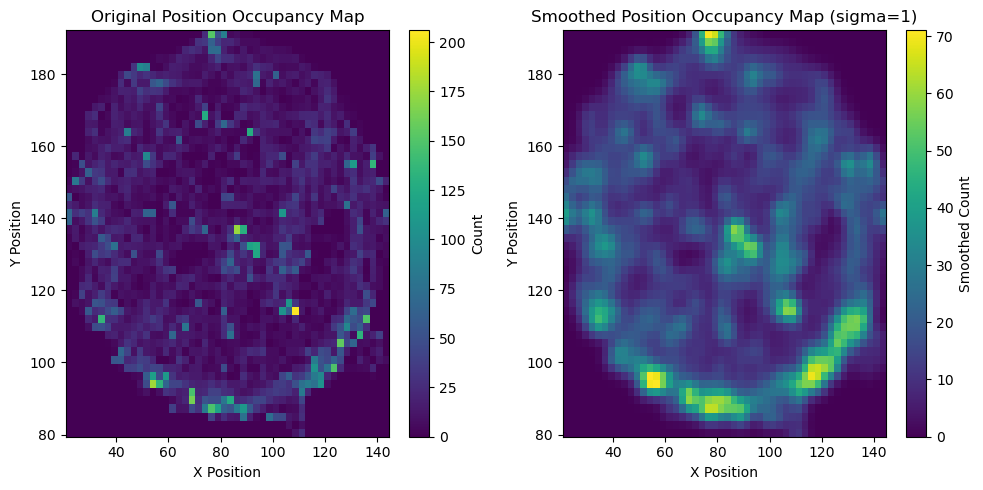

In [414]:
# Apply Gaussian filter for smoothing
# Compute the 2D histogram/bin counts using the cleaned position data
clean_pc1_fepos = pc1_fepos[~np.isnan(pc1_fepos).any(axis=1)]

# Create the position occupancy map (pos_occ) using a 2D histogram
pos_occ, Xedges, Yedges = np.histogram2d(clean_pc1_fepos[:, 1], clean_pc1_fepos[:, 0], bins=50)
sigma_value = 1  # Adjust this sigma value as needed for the level of smoothing
smoothed_pos_occ = gaussian_filter(pos_occ, sigma=sigma_value)

# Plot the original position occupancy map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pos_occ, interpolation='nearest', origin='lower',
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')
plt.colorbar(label='Count')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Original Position Occupancy Map')

# Plot the smoothed position occupancy map
plt.subplot(1, 2, 2)
plt.imshow(smoothed_pos_occ, interpolation='nearest', origin='lower',
           extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto')
plt.colorbar(label='Smoothed Count')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Smoothed Position Occupancy Map (sigma={sigma_value})')

plt.tight_layout()
plt.show()

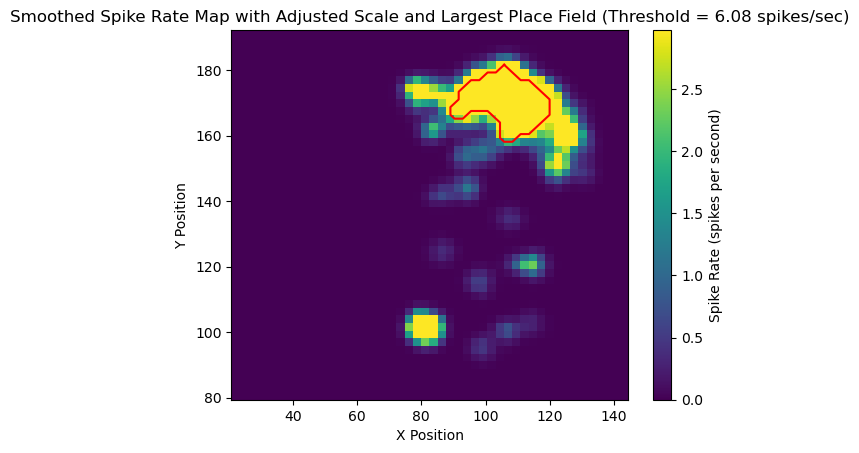

Threshold for Place Field: 6.08 spikes per second


In [416]:
from skimage import measure
from scipy.ndimage import zoom

# Resize smoothed_pos_occ_map to match the shape of smoothed_spike_map
resize_factor = smoothed_spike_map.shape[0] / smoothed_pos_occ.shape[0]
smoothed_pos_occ_map = zoom(smoothed_pos_occ, resize_factor)

# Now, avoid dividing by zero and normalize the spike map by the position occupancy map
# Multiplying by 60 to convert to spikes per second
smoothed_spike_rate_map = np.divide(smoothed_spike_map, smoothed_pos_occ_map, 
                                    out=np.zeros_like(smoothed_spike_map), where= smoothed_pos_occ_map > 0) * 60



# Use the max value from the non-smoothed map for the threshold
max_spike_rate = np.nanmax(smoothed_spike_rate_map)
threshold = 0.10 * max_spike_rate

# Create a mask for the place field (True for values above the threshold)
place_field_mask = smoothed_spike_rate_map >= threshold

# Adjust the scale to show more yellow and green dots
vmin_value = 0  # Minimum value for the color scale
vmax_value = np.percentile(smoothed_spike_rate_map, 95)  # Use 95th percentile for vmax

# Find contours in the place field mask
contours = measure.find_contours(place_field_mask, level=0.5)

# Function to calculate the area of a contour using the Shoelace formula (polygon area in 2D)
def contour_area(contour):
    x = contour[:, 1]  # X values
    y = contour[:, 0]  # Y values
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Find the largest contour based on the calculated area
largest_contour = max(contours, key=contour_area)

# Plot the smoothed spike rate map with adjusted color scale
plt.figure()
img = plt.imshow(smoothed_spike_rate_map, interpolation='nearest', origin='lower', 
                 extent=[Xedges[0], Xedges[-1], Yedges[0], Yedges[-1]], aspect='auto', 
                 vmin=vmin_value, vmax=vmax_value)

# Add the color bar for the spike rate map
plt.colorbar(img, label='Spike Rate (spikes per second)')

# Overlay only the largest contour and plot it at the correct position
plt.plot(largest_contour[:, 1] * (Xedges[-1] - Xedges[0]) / place_field_mask.shape[1] + Xedges[0], 
         largest_contour[:, 0] * (Yedges[-1] - Yedges[0]) / place_field_mask.shape[0] + Yedges[0], 
         color='red')

# Add labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Smoothed Spike Rate Map with Adjusted Scale and Largest Place Field (Threshold = {threshold:.2f} spikes/sec)')

plt.show()

# Print threshold for reference
print(f"Threshold for Place Field: {threshold:.2f} spikes per second")


In [418]:
import numpy as np
from matplotlib.path import Path


# Extract the x and y coordinates of the largest contour
# Apply scaling based on Xedges and Yedges to map contour coordinates to position scale
contour_x = largest_contour[:, 1] * (Xedges[-1] - Xedges[0]) / place_field_mask.shape[1] + Xedges[0]
contour_y = largest_contour[:, 0] * (Yedges[-1] - Yedges[0]) / place_field_mask.shape[0] + Yedges[0]

# Create a Path object from the contour coordinates to use for point-in-polygon testing
place_field_path = Path(np.column_stack((contour_y, contour_x)))

# Now, we can filter the positions in the dataset to check if they lie within the place field
positions = clean_pc1_fepos  # Make sure these positions are in the same coordinate space

# Find positions within the contour
in_place_field = place_field_path.contains_points(positions)

# Extract the positions that are within the place field
positions_in_place_field = positions[in_place_field]

# Print or save the results
print("Positions within the largest place field:")
print(positions_in_place_field)

Positions within the largest place field:
[[175.54533509  94.41812152]
 [175.0338527   94.63950942]
 [174.49946812  94.90288468]
 ...
 [160.94900194 108.93811401]
 [160.46042175 109.12133158]
 [159.94893937 109.30836618]]


In [420]:
import numpy as np

# Find indices where the value changes in in_place_field
transitions = np.where(np.diff(in_place_field.astype(int)) != 0)[0]

# Extract the positions corresponding to the transition points
enter_exit_positions = positions[transitions]

# filtering out immediate trips

# Find indices where the value changes in in_place_field
transitions = np.where(np.diff(in_place_field.astype(int)) != 0)[0]

# Filter out consecutive transitions
filtered_transitions = [transitions[0]]  # Start with the first transition

for i in range(1, len(transitions)):
    # Only keep the transition if it is at least 2 positions away from the last kept transition
    if transitions[i] - filtered_transitions[-1] >= 2:
        filtered_transitions.append(transitions[i])

# Extract the positions corresponding to the filtered transition points
filtered_enter_exit_positions = positions[filtered_transitions]

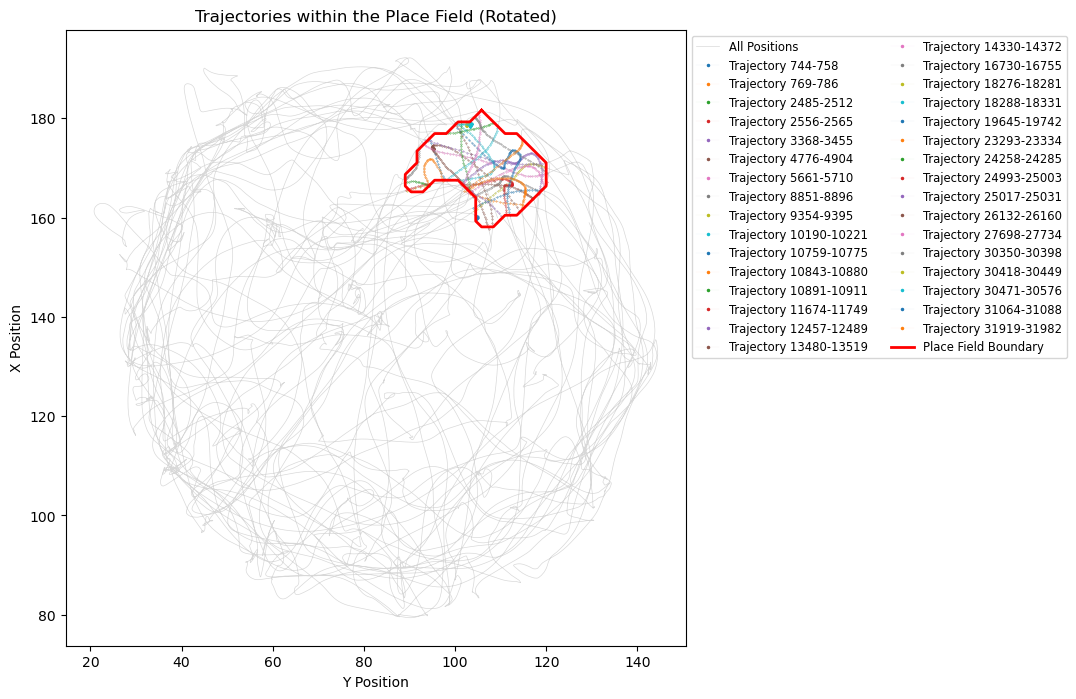

In [422]:
# Assuming filtered_transitions contains the indices of enter and exit points
# Ensure transitions are paired (enter followed by exit)
enter_exit_pairs = []
i = 0
while i < len(filtered_transitions) - 1:
    enter_idx = filtered_transitions[i]
    exit_idx = filtered_transitions[i + 1]
    # Ensure there is an exit following each enter
    if in_place_field[enter_idx] == False and in_place_field[exit_idx] == True:
        enter_exit_pairs.append((enter_idx, exit_idx))
        i += 2  # Move to the next pair
    else:
        i += 1  # Skip if not a valid enter-exit pair

# Plot the trajectories with switched coordinates and thinner lines
plt.figure(figsize=(8, 8))

# Plot all positions for context
plt.plot(positions[:, 1], positions[:, 0], 'gray', alpha=0.3, linewidth=0.5, label="All Positions")

# Plot trajectories within each enter-exit pair
for idx, (enter_idx, exit_idx) in enumerate(enter_exit_pairs):
    # Extract the trajectory positions between enter and exit
    trajectory_positions = positions[enter_idx:exit_idx + 1]
    # Plot the trajectory with thinner lines and switched coordinates
    plt.plot(trajectory_positions[:, 1], trajectory_positions[:, 0], marker='o', markersize=0.3, linewidth=0.02, label=f'Trajectory {enter_idx}-{exit_idx}')

# Plot the contour of the place field for reference with switched coordinates
plt.plot(contour_x, contour_y, 'r-', linewidth=2, label='Place Field Boundary')

# Labels and title
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.title('Trajectories within the Place Field (Rotated)')

# Optional: Limit the number of legend entries for readability
if len(enter_exit_pairs) > 20:
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2, fontsize="small", markerscale=5)
else:
    plt.legend()

# Save the plot as a file
# plt.savefig('trajectories_within_place_field.png', format='png', dpi=300)

plt.show()

In [89]:
import numpy as np

def calculate_trajectory_percentage(trajectory_positions):
    """
    计算每个点相对整个 trajectory 的百分比 (基于路径长度)

    Parameters:
    - trajectory_positions (array): 该 trajectory 的所有位置坐标 (Nx2 array)

    Returns:
    - percentages (array): 每个点的轨迹完成比例 (0-100%)
    """
    # 计算相邻点之间的欧几里得距离
    distances = np.sqrt(np.sum(np.diff(trajectory_positions, axis=0) ** 2, axis=1))
    
    # 计算累积路径长度
    cumulative_distance = np.insert(np.cumsum(distances), 0, 0)  # 插入 0 作为起始点
    
    # 计算总路径长度
    total_distance = cumulative_distance[-1]

    # 计算 percentage
    if total_distance > 0:
        percentages = (cumulative_distance / total_distance) * 100
    else:
        percentages = np.zeros_like(cumulative_distance)  # 避免除零错误
    
    return percentages

# 重新计算所有 trajectories 的 percentage
for traj_name, traj_info in trajectory_data.items():
    positions = traj_info["positions"]
    
    # 计算新的 percentage
    new_percentages = calculate_trajectory_percentage(positions)

    # 更新 trajectory_data
    trajectory_data[traj_name]["percentages"] = new_percentages


In [194]:
pc1_fepos[0]

array([158.96796195, 129.39740942])

In [226]:
rat_pos_fe[0]

array([158.96796195, 129.39740942])

In [218]:
np.count_nonzero(pc1_feSt)

218

In [206]:
# Find index where pc1_fepos[0] exactly matches in rat_pos
index_match = np.where((ratPos == pc1_fepos[0]).all(axis=1))[0]

# Print result
if len(index_match) > 0:
    print(f"First occurrence of pc1_fepos[0] is at index {index_match[0]} in rat_pos")
else:
    print("No exact match found!")

First occurrence of pc1_fepos[0] is at index 75517 in rat_pos


In [426]:
adjusted_trajectory_data = trajectory_data

# Initialize an empty list to store the vectors
trajectory_ranges = []

# Iterate through the keys in the dictionary
for traj_name in adjusted_trajectory_data.keys():
    # Extract the start and end serial numbers from the key
    start_end_part = traj_name.split(" ")[1]  # Extract the "5002–5079" part
    # Replace the en dash (–) with a regular hyphen (-) before splitting
    start_serial, end_serial = map(int, start_end_part.replace("–", "-").split("-"))

    # Create a vector (range) and append it to the list
    trajectory_ranges.append(list(range(start_serial, end_serial + 1)))

# Check the result
for idx, traj_range in enumerate(trajectory_ranges[:5]):  # Display the first 5 for verification
    print(f"Trajectory {idx + 1}: {traj_range[:5]} ... {traj_range[-5:]}")

Trajectory 1: [1640, 1641, 1642, 1643, 1644] ... [1713, 1714, 1715, 1716, 1717]
Trajectory 2: [3102, 3103, 3104, 3105, 3106] ... [3187, 3188, 3189, 3190, 3191]
Trajectory 3: [3236, 3237, 3238, 3239, 3240] ... [3248, 3249, 3250, 3251, 3252]
Trajectory 4: [3533, 3534, 3535, 3536, 3537] ... [3542, 3543, 3544, 3545, 3546]
Trajectory 5: [3634, 3635, 3636, 3637, 3638] ... [3771, 3772, 3773, 3774, 3775]


In [428]:
# Step 1: Match trajectory labels to time_session data
trajectory_times = {}

for traj_name, traj_data in adjusted_trajectory_data.items():
    # Extract start and end serials from the adjusted trajectory labels
    start_end_part = traj_name.split(" ")[1]  # Extract the "5002–5079" part
    start_serial, end_serial = map(int, start_end_part.replace("–", "-").split("-"))  # Replace en dash and split
    
    # Retrieve corresponding time values from time_session
    traj_time_values = time_session_fe[start_serial:end_serial + 1]
    
    # Store in the dictionary
    trajectory_times[traj_name] = traj_time_values

# Step 2: Define a function to find closest intervals in lfp_time for each trajectory's time values
def find_closest_lfp_intervals(traj_time_values, lfp_time):
    closest_lfp_indices = []
    
    for time_value in traj_time_values:
        # Find the closest index in lfp_time
        closest_idx = np.argmin(np.abs(lfp_time - time_value))
        closest_lfp_indices.append(closest_idx)
    
    return closest_lfp_indices

# Step 3: Apply the function to each trajectory
all_closest_lfp_intervals = {}

lfp_time = good_lfps[:, 0] 

for traj_name, traj_time_values in trajectory_times.items():
    # Find closest LFP intervals
    closest_lfp_indices = find_closest_lfp_intervals(traj_time_values, lfp_time)
    
    # Retrieve the corresponding LFP time values
    closest_lfp_times = lfp_time[closest_lfp_indices]
    
    # Store in the dictionary
    all_closest_lfp_intervals[traj_name] = {
        "indices": closest_lfp_indices,
        "times": closest_lfp_times
    }

In [432]:
def filter_trajectory_percentages(trajectory_data, all_closest_lfp_intervals, threshold=0.5):
    """
    Selects only the percentage keys from trajectory_data where the trajectory duration > 0.5s.

    Parameters:
    - trajectory_data (dict): Dictionary containing trajectory positions and percentages.
    - all_closest_lfp_intervals (dict): Dictionary mapping trajectory names to LFP time intervals.
    - threshold (float): Minimum allowed duration for a trajectory.

    Returns:
    - filtered_percentages (dict): Dictionary containing only percentage data for valid trajectories.
    """
    filtered_percentages = {}

    for traj_name, data in trajectory_data.items():
        # Check if this trajectory exists in LFP time intervals
        if traj_name in all_closest_lfp_intervals:
            times = all_closest_lfp_intervals[traj_name]["times"]
            duration = times[-1] - times[0]  # Compute duration

            # Keep only trajectories with duration > 0.5s
            if duration > threshold and "percentages" in data:
                filtered_percentages[traj_name] = data["percentages"]

    return filtered_percentages

# Example usage:
filtered_trajectory_percentages_fe = filter_trajectory_percentages(adjusted_trajectory_data, all_closest_lfp_intervals, threshold=0.5)

# Print number of filtered trajectories
print(f"Total valid trajectories: {len(filtered_trajectory_percentages_fe)}")


IndexError: index -1 is out of bounds for axis 0 with size 0

In [298]:
# Initialize dictionary to store start and end times
trajectory_time_ranges_fe = {}

# Iterate over all trajectories in filtered_trajectory_percentages_fe
for traj_name in filtered_trajectory_percentages_fe.keys():
    if traj_name in all_closest_lfp_intervals:
        # Extract the "times" array for the current trajectory
        traj_times = all_closest_lfp_intervals[traj_name]["times"]

        # Compute start and end time
        start_time = traj_times[0]  # First time value
        end_time = traj_times[-1]  # Last time value

        # Store in dictionary
        trajectory_time_ranges_fe[traj_name] = {
            "start_time": start_time,
            "end_time": end_time
        }

# Print results for verification
for traj_name, times in trajectory_time_ranges_fe.items():
    print(f"{traj_name}: Start Time = {times['start_time']:.3f}, End Time = {times['end_time']:.3f}")


Trajectory 3368-3455: Start Time = 1314.793, End Time = 1316.243
Trajectory 4776-4904: Start Time = 1338.260, End Time = 1340.393
Trajectory 5661-5710: Start Time = 1353.010, End Time = 1353.827
Trajectory 8851-8896: Start Time = 1406.178, End Time = 1406.928
Trajectory 9354-9395: Start Time = 1414.561, End Time = 1415.245
Trajectory 10190-10221: Start Time = 1428.495, End Time = 1429.012
Trajectory 10843-10880: Start Time = 1439.378, End Time = 1439.995
Trajectory 11674-11749: Start Time = 1453.229, End Time = 1454.479
Trajectory 12457-12489: Start Time = 1466.279, End Time = 1466.812
Trajectory 13480-13519: Start Time = 1483.329, End Time = 1483.979
Trajectory 14330-14372: Start Time = 1497.496, End Time = 1498.196
Trajectory 18288-18331: Start Time = 1563.464, End Time = 1564.181
Trajectory 19645-19742: Start Time = 1586.081, End Time = 1587.698
Trajectory 23293-23334: Start Time = 1646.883, End Time = 1647.566
Trajectory 27698-27734: Start Time = 1720.301, End Time = 1720.901
Traje

In [202]:
def match_spikes_to_trajectories(spike_times, trajectory_time_ranges):
    """
    Matches each spike time to a trajectory based on start and end times.
    Also records the indices of matched spikes.

    Parameters:
    - spike_times (numpy array): Array of spike times.
    - trajectory_time_ranges (dict): Dictionary with trajectory names as keys
                                     and a dict containing 'start_time' and 'end_time'.

    Returns:
    - spike_to_trajectory (dict): Dictionary mapping trajectory names to spike times.
    - unmatched_spikes (list): List of spike times that do not match any trajectory.
    - matched_spike_indices (list): List of indices of spikes that were matched to a trajectory.
    """

    spike_to_trajectory = {traj_name: [] for traj_name in trajectory_time_ranges}
    unmatched_spikes = []
    matched_spike_indices = []

    for i, spike in enumerate(spike_times):
        matched = False
        for traj_name, times in trajectory_time_ranges.items():
            if times["start_time"] <= spike <= times["end_time"]:
                spike_to_trajectory[traj_name].append(spike)
                matched_spike_indices.append(i)  # Store the index of the matched spike
                matched = True
                break  # Stop searching once a match is found

        if not matched:
            unmatched_spikes.append(spike)

    return spike_to_trajectory, unmatched_spikes, matched_spike_indices


# Example usage:
matched_spikes, unmatched_spikes, matched_spike_indices = match_spikes_to_trajectories(
    pursuit_spike_times, trajectory_time_ranges
)

# Print results for verification
for traj, spikes in matched_spikes.items():
    print(f"{traj}: {len(spikes)} spikes matched.")

print(f"\nTotal unmatched spikes: {len(unmatched_spikes)}")
print(f"\nTotal matched spikes: {len(matched_spike_indices)}")



Trajectory 191-281: 0 spikes matched.
Trajectory 380-474: 0 spikes matched.
Trajectory 1634-1712: 0 spikes matched.
Trajectory 1766-1827: 16 spikes matched.
Trajectory 1962-1977: 0 spikes matched.
Trajectory 1982-2006: 0 spikes matched.
Trajectory 2092-2147: 0 spikes matched.
Trajectory 3069-3183: 2 spikes matched.
Trajectory 3639-3772: 2 spikes matched.
Trajectory 3810-3963: 0 spikes matched.
Trajectory 4436-4619: 1 spikes matched.
Trajectory 5029-5343: 0 spikes matched.
Trajectory 5357-5364: 0 spikes matched.
Trajectory 5421-5755: 0 spikes matched.
Trajectory 6475-6542: 0 spikes matched.
Trajectory 6664-6675: 0 spikes matched.
Trajectory 6680-6708: 0 spikes matched.
Trajectory 6788-7355: 0 spikes matched.
Trajectory 7643-7689: 0 spikes matched.
Trajectory 7940-7995: 0 spikes matched.
Trajectory 8335-8352: 0 spikes matched.
Trajectory 8592-8685: 1 spikes matched.
Trajectory 8711-8717: 0 spikes matched.
Trajectory 8926-8942: 0 spikes matched.
Trajectory 9090-9166: 0 spikes matched.
Tra

In [226]:
matched_spike_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 20,
 21,
 22,
 34,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 80,
 89,
 90,
 91,
 92,
 102,
 103,
 104,
 105,
 114,
 116,
 125,
 126,
 127,
 128,
 129,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 162,
 186,
 187,
 188,
 189,
 202,
 203,
 204,
 206,
 221,
 222,
 223,
 233,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 268,
 269]

In [204]:
# Function to filter trajectories that contain at least one matched spike
def filter_trajectories_with_spikes(matched_spikes, trajectory_time_ranges):
    """
    Filters trajectories that have at least one spike matched.
    
    Parameters:
    - matched_spikes: Dictionary of trajectories with matched spikes.
    - trajectory_time_ranges: Original dictionary of all trajectory time ranges.
    
    Returns:
    - filtered_trajectories: Dictionary of only trajectories that contain matched spikes.
    """
    # Keep only trajectories that have spikes
    filtered_trajectories = {traj: trajectory_time_ranges[traj] for traj in matched_spikes if len(matched_spikes[traj]) > 0}
    
    return filtered_trajectories

# Apply the function
filtered_trajectory_time_ranges = filter_trajectories_with_spikes(matched_spikes, trajectory_time_ranges)

# Print the number of trajectories before and after filtering
print(f"Total trajectories before filtering: {len(trajectory_time_ranges)}")
print(f"Total trajectories with spikes: {len(filtered_trajectory_time_ranges)}")


Total trajectories before filtering: 253
Total trajectories with spikes: 26


In [188]:
# Extract percentages for trajectories that exist in filtered_trajectory_time_ranges
filtered_trajectory_percentages = {
    traj: trajectory_data[traj]["percentages"]
    for traj in filtered_trajectory_time_ranges.keys()
    if traj in trajectory_data
}

# Print the filtered trajectory percentages
for traj, percentages in filtered_trajectory_percentages.items():
    print(f"{traj}: {percentages}")


Trajectory 1766-1827: [  0.           1.63934426   3.27868852   4.91803279   6.55737705
   8.19672131   9.83606557  11.47540984  13.1147541   14.75409836
  16.39344262  18.03278689  19.67213115  21.31147541  22.95081967
  24.59016393  26.2295082   27.86885246  29.50819672  31.14754098
  32.78688525  34.42622951  36.06557377  37.70491803  39.3442623
  40.98360656  42.62295082  44.26229508  45.90163934  47.54098361
  49.18032787  50.81967213  52.45901639  54.09836066  55.73770492
  57.37704918  59.01639344  60.6557377   62.29508197  63.93442623
  65.57377049  67.21311475  68.85245902  70.49180328  72.13114754
  73.7704918   75.40983607  77.04918033  78.68852459  80.32786885
  81.96721311  83.60655738  85.24590164  86.8852459   88.52459016
  90.16393443  91.80327869  93.44262295  95.08196721  96.72131148
  98.36065574 100.        ]
Trajectory 3069-3183: [  0.           0.87719298   1.75438596   2.63157895   3.50877193
   4.38596491   5.26315789   6.14035088   7.01754386   7.89473684
   8.

In [192]:
def map_spikes_to_trajectory_percentage(spike_times, trajectory_time_ranges, trajectory_percentages):
    """
    Maps each spike time to the closest trajectory percentage.

    Parameters:
    - spike_times (array): Extracted spike times.
    - trajectory_time_ranges (dict): Dict mapping trajectory names to {'start_time', 'end_time'}.
    - trajectory_percentages (dict): Dict mapping trajectory names to percentage arrays.

    Returns:
    - spike_percentages (array): Trajectory percentage at which each spike occurred.
    """
    spike_percentages = []

    for spike_time in spike_times:
        for traj_name, times in trajectory_time_ranges.items():
            if times["start_time"] <= spike_time <= times["end_time"]:
                # Find the closest timestamp within this trajectory and get the corresponding percentage
                time_array = trajectory_percentages[traj_name]  # Percentage values
                num_points = len(time_array)

                # Compute percentage based on time within trajectory
                normalized_time = (spike_time - times["start_time"]) / (times["end_time"] - times["start_time"])
                trajectory_percentage = normalized_time * 100  # Convert to percentage scale
                spike_percentages.append(trajectory_percentage)
                break  # Stop searching once we find the matching trajectory

    return np.array(spike_percentages)

# Recalculate pursuit and free exploration trajectory percentages
pursuit_trajectory_percentages = map_spikes_to_trajectory_percentage(
    pursuit_spike_times, filtered_trajectory_time_ranges, filtered_trajectory_percentages
)

# free_exploration_trajectory_percentages = map_spikes_to_trajectory_percentage(
#     fe_spike_times, trajectory_time_ranges, filtered_trajectory_percentages
# )

# Print length checks
print(f"Recomputed Pursuit Trajectory Percentages: {len(pursuit_trajectory_percentages)}")


Recomputed Pursuit Trajectory Percentages: 101


In [196]:
pursuit_trajectory_percentages.size

101

In [210]:
len(matched_spike_indices)

101

In [212]:
pursuit_phases_pi.size

288

In [220]:
matched_spike_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 20,
 21,
 22,
 34,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 80,
 89,
 90,
 91,
 92,
 102,
 103,
 104,
 105,
 114,
 116,
 125,
 126,
 127,
 128,
 129,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 162,
 186,
 187,
 188,
 189,
 202,
 203,
 204,
 206,
 221,
 222,
 223,
 233,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 268,
 269]

In [232]:
matched_phases = pursuit_phases[matched_spike_indices]

In [234]:
# Convert pursuit phases to use π as the unit
matched_phases = matched_phases / np.pi  # Convert to units of π

# Store in a DataFrame
df_matched_phases = pd.DataFrame({
    "Trajectory Percentage": pursuit_trajectory_percentages,
    "Phase (π unit)": matched_phases
})

# Display the DataFrame
print(df_matched_phases)


     Trajectory Percentage  Phase (π unit)
0                45.919371        1.034320
1                54.080629        0.514283
2                55.752212        0.813143
3                57.325467        1.090638
4                58.997050        1.380415
..                     ...             ...
96               96.591684        0.561421
97               97.682345        0.840144
98               98.841172        1.149129
99               38.888889        1.939254
100              40.777778        0.221164

[101 rows x 2 columns]


     Percentage     Phase
0     45.919371  1.034320
1     54.080629  0.514283
2     55.752212  0.813143
3     57.325467  1.090638
4     58.997050  1.380415
..          ...       ...
96    96.591684  0.561421
97    97.682345  0.840144
98    98.841172  1.149129
99    38.888889  1.939254
100   40.777778  0.221164

[101 rows x 2 columns]


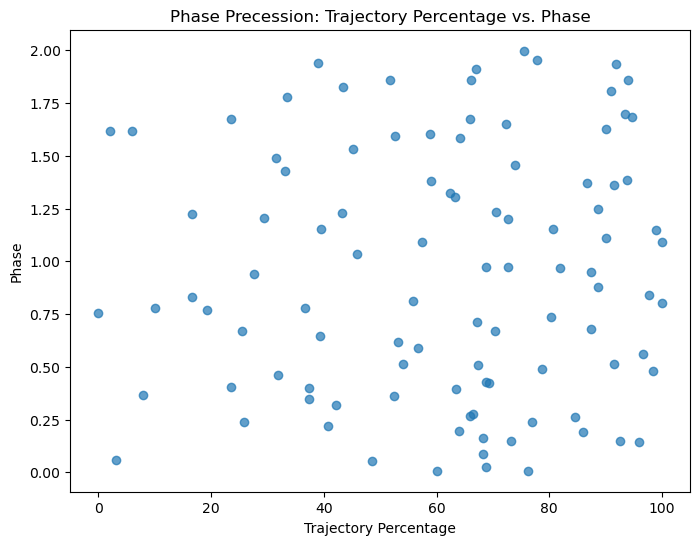

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the values
data = {
    "Percentage": pursuit_trajectory_percentages,
    "Phase": matched_phases
}
df = pd.DataFrame(data)

# Display the table
print(df)

# Plot the relationship between percentage and phase
plt.figure(figsize=(8, 6))
plt.scatter(df["Percentage"], df["Phase"], alpha=0.7)
plt.xlabel("Trajectory Percentage")
plt.ylabel("Phase")
plt.title("Phase Precession: Trajectory Percentage vs. Phase")
plt.show()

df.to_csv("pursuit_phase_precession.csv", index=False)



In [394]:
# Initialize dictionary to store start and end times for all trajectories
all_trajectory_time_ranges = {}

# Iterate over all trajectories in trajectory_data (including filtered-out ones)
for traj_name in trajectory_data.keys():
    if traj_name in all_closest_lfp_intervals:
        # Extract the "times" array for the current trajectory
        traj_times = all_closest_lfp_intervals[traj_name]["times"]

        # Compute start and end time
        start_time = traj_times[0]  # First time value
        end_time = traj_times[-1]  # Last time value

        # Store in dictionary
        all_trajectory_time_ranges[traj_name] = {
            "start_time": start_time,
            "end_time": end_time
        }

# Print a few results for verification
for traj_name, times in list(all_trajectory_time_ranges.items())[:5]:  # Print first 5
    print(f"{traj_name}: Start Time = {times['start_time']:.3f}, End Time = {times['end_time']:.3f}")


Trajectory 1640-1717: Start Time = 83.368, End Time = 84.651
Trajectory 3102-3191: Start Time = 107.735, End Time = 109.218
Trajectory 3236-3252: Start Time = 109.968, End Time = 110.235
Trajectory 3533-3546: Start Time = 114.919, End Time = 115.135
Trajectory 3634-3775: Start Time = 116.602, End Time = 118.952


In [396]:
def match_unmatched_spikes_to_all_trajectories(unmatched_spikes, all_trajectory_time_ranges):
    """
    Matches each unmatched spike time to a trajectory in all_trajectory_time_ranges.

    Parameters:
    - unmatched_spikes (list): List of spike times that were unmatched.
    - all_trajectory_time_ranges (dict): Dictionary with trajectory names as keys
                                         and 'start_time'/'end_time'.

    Returns:
    - recovered_spikes (dict): Dictionary mapping trajectory names to newly matched spike times.
    - still_unmatched_spikes (list): List of spikes that remain unmatched.
    """

    recovered_spikes = {traj_name: [] for traj_name in all_trajectory_time_ranges}
    still_unmatched_spikes = []

    for spike in unmatched_spikes:
        matched = False
        for traj_name, times in all_trajectory_time_ranges.items():
            if times["start_time"] <= spike <= times["end_time"]:
                recovered_spikes[traj_name].append(spike)
                matched = True
                break  # Stop searching once a match is found

        if not matched:
            still_unmatched_spikes.append(spike)

    return recovered_spikes, still_unmatched_spikes


# Apply function to find if unmatched spikes belong to filtered-out trajectories
recovered_spikes, still_unmatched_spikes = match_unmatched_spikes_to_all_trajectories(unmatched_spikes, all_trajectory_time_ranges)

# Print results
for traj, spikes in recovered_spikes.items():
    if len(spikes) > 0:
        print(f"{traj}: {len(spikes)} unmatched spikes recovered.")

print(f"\nTotal spikes still unmatched: {len(still_unmatched_spikes)}")


Trajectory 19242-19262: 1 unmatched spikes recovered.
Trajectory 31002-31020: 1 unmatched spikes recovered.

Total spikes still unmatched: 273


In [ ]:
import pandas as pd

# Construct DataFrame for analysis
data = {
    "Spike Time (s)": spike_times,
    "Theta Phase (0-2π)": matched_phases,
    "Trajectory Percentage (%)": trajectory_percentages["Trajectory 1"],  # Adjust for specific trajectory
}

df = pd.DataFrame(data)
print(df.head())  # Preview the data


Slope: 0.0010
Intercept: 0.8769
R-squared: 0.0022
P-value: 0.6391
Standard Error: 0.0022


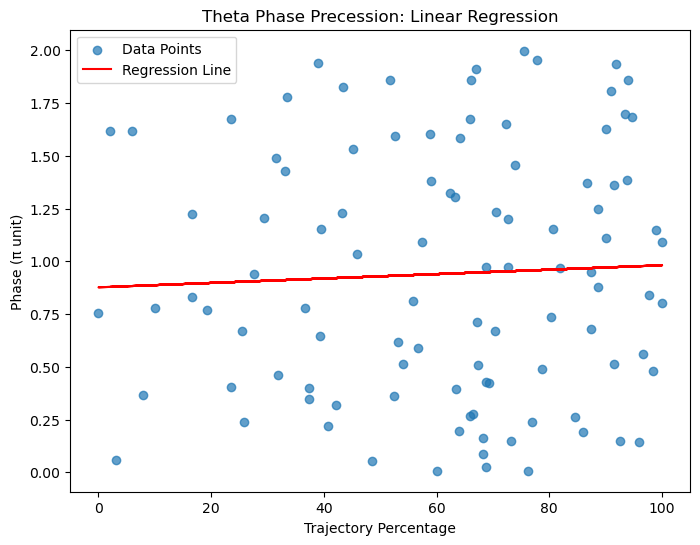

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df["Percentage"], df["Phase"])

# Print the results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")

# Plot the scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(df["Percentage"], df["Phase"], alpha=0.7, label="Data Points")
plt.plot(df["Percentage"], intercept + slope * df["Percentage"], color="red", label="Regression Line")
plt.xlabel("Trajectory Percentage")
plt.ylabel("Phase (π unit)")
plt.title("Theta Phase Precession: Linear Regression")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["Trajectory Percentage (%)"], df["Theta Phase (0-2π)"], alpha=0.5)
plt.xlabel("Trajectory Completion (%)")
plt.ylabel("Theta Phase (0-2π)")
plt.title("Theta Phase vs. Trajectory Progress")
plt.show()